In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\bitcamp\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

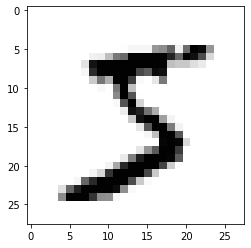

In [5]:
plt.imshow(x_train[0], cmap='Greys')

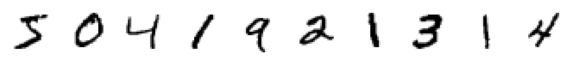

In [7]:
fig, axs =plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
type(x_train)

numpy.ndarray

In [10]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train_vec = x_train.reshape(60000, 28*28)
x_test_vec = x_test.reshape(10000, 28*28)

In [6]:
y_train_oh = utils.to_categorical(y_train)
y_test_oh = utils.to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Dense(112, input_dim= 28*28, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               87920     
                                                                 
 dense_1 (Dense)             (None, 56)                6328      
                                                                 
 dense_2 (Dense)             (None, 28)                1596      
                                                                 
 dense_3 (Dense)             (None, 10)                290       
                                                                 
Total params: 96,134
Trainable params: 96,134
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
hist = model.fit(x_train_vec, y_train_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 9s 3ms/step - loss: 1.1226 - accuracy: 0.7967 - val_loss: 0.4294 - val_accuracy: 0.8899
Epoch 2/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.3169 - accuracy: 0.9187 - val_loss: 0.2328 - val_accuracy: 0.9348
Epoch 3/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2146 - accuracy: 0.9422 - val_loss: 0.1916 - val_accuracy: 0.9481
Epoch 4/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1659 - accuracy: 0.9542 - val_loss: 0.1814 - val_accuracy: 0.9529
Epoch 5/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1420 - accuracy: 0.9609 - val_loss: 0.1704 - val_accuracy: 0.9568
Epoch 6/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1294 - accuracy: 0.9645 - val_loss: 0.1485 - val_accuracy: 0.9613
Epoch 7/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1074 - accuracy: 0.9705 - val_loss: 0.1394 - val_accuracy:

In [10]:
model.evaluate(x_test_vec, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.1285 - accuracy: 0.9729


[0.128515362739563, 0.9728999733924866]

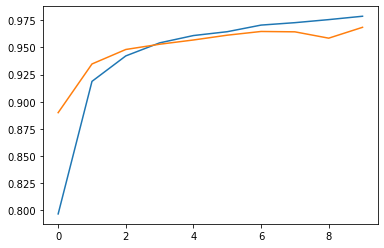

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

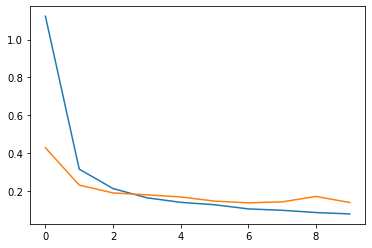

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [12]:
# CNN

In [13]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

In [14]:
x_train_cov = x_train.reshape(60000, 28, 28, 1) # data num, row num, col num, depth
x_test_cov = x_test.reshape(10000, 28, 28, 1)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
model.fit(x_test_cov, y_test_oh, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 4s 5ms/step - loss: 1.3069 - accuracy: 0.8956 - val_loss: 0.1222 - val_accuracy: 0.9595
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0808 - accuracy: 0.9749 - val_loss: 0.0941 - val_accuracy: 0.9695
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1259 - val_accuracy: 0.9695
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.1078 - val_accuracy: 0.9700
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0965 - val_accuracy: 0.9785
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0395 - accuracy: 0.9898 - val_loss: 0.1149 - val_accuracy: 0.9710
Epoch 7/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.1269 - val_accuracy: 0.9755
Epoch 